In [ ]:
from pathlib import Path
import torch
import yaml
from torchinfo import summary
from gan import Generator

with open('config.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    train_config = config["training"]
    dirs_config = config["dirs"]

device = "cuda" if torch.cuda.is_available() else "cpu"

gan_dir = str(Path(dirs_config["models_dir"]) / "generator_01112024-212453.pt")
gan = Generator(train_config["latent_dim"], 1)
gan.load_state_dict(torch.load(gan_dir, weights_only=True))
gan.to(device)
gan.eval()

summary(gan, input_size=(1, train_config["latent_dim"], 1, 1), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
Generator                                [1, 1, 28, 28]            --
├─Sequential: 1-1                        [1, 1, 28, 28]            --
│    └─ConvTranspose2d: 2-1              [1, 512, 3, 3]            589,824
│    └─BatchNorm2d: 2-2                  [1, 512, 3, 3]            1,024
│    └─GELU: 2-3                         [1, 512, 3, 3]            --
│    └─ConvTranspose2d: 2-4              [1, 256, 7, 7]            1,179,648
│    └─BatchNorm2d: 2-5                  [1, 256, 7, 7]            512
│    └─GELU: 2-6                         [1, 256, 7, 7]            --
│    └─ConvTranspose2d: 2-7              [1, 128, 14, 14]          524,288
│    └─BatchNorm2d: 2-8                  [1, 128, 14, 14]          256
│    └─GELU: 2-9                         [1, 128, 14, 14]          --
│    └─ConvTranspose2d: 2-10             [1, 1, 28, 28]            2,049
│    └─Tanh: 2-11                        [1, 1, 28, 28]     

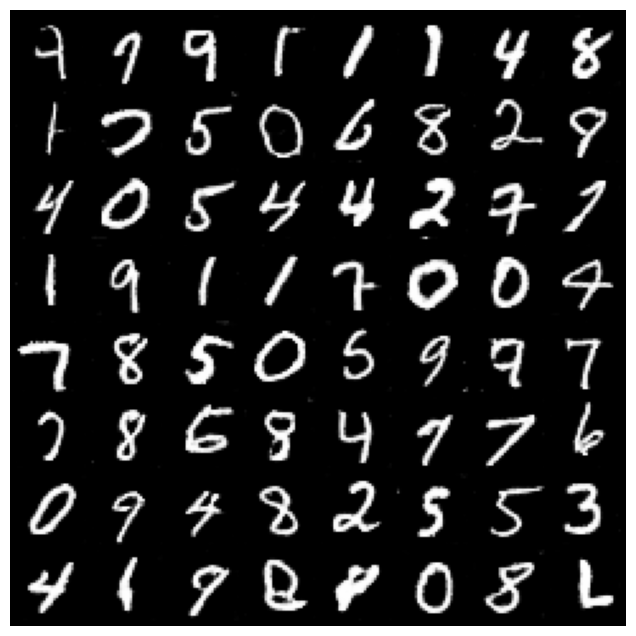

In [16]:
from matplotlib import pyplot as plt
from torchvision.utils import make_grid

n_images = 64
latent_dim = train_config["latent_dim"]
noise = torch.randn(n_images, latent_dim, 1, 1, device=device)
fake_images = gan(noise).detach()

grid = make_grid(fake_images, nrow=8, normalize=True)
grid = grid.permute(1, 2, 0).cpu().numpy()

plt.figure(figsize=(8, 8))
plt.imshow(grid)
plt.axis('off')
plt.show()